# L1 & L2 Regularization | Lasso, Ridge Regression

In [1]:
import pandas as pd
import numpy as np 
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('Housing.csv')
df.index+=1
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
1,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
2,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
3,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
4,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
5,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
542,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
543,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
544,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [4]:
df.duplicated().sum()
df = pd.get_dummies(df,drop_first='True')
df

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
1,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
2,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
3,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
4,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
5,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,1820000,3000,2,1,1,2,True,False,True,False,False,False,False,True
542,1767150,2400,3,1,1,0,False,False,False,False,False,False,True,False
543,1750000,3620,2,1,1,0,True,False,False,False,False,False,False,True
544,1750000,2910,3,1,1,0,False,False,False,False,False,False,False,False


In [5]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [6]:
x = df.drop('price',axis=1)
y = df.price

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.1,random_state=2)

# LogisticRegression

In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(x_train,y_train)

In [10]:
lr.score(x_test,y_test)

0.05454545454545454

In [11]:
lr.score(x_train,y_train)

0.07551020408163266

In [12]:
from sklearn import linear_model
lm = linear_model.Lasso(alpha=50,max_iter=100,tol=.1)
lm.fit(x_train,y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [13]:
lm.score(x_test,y_test)

0.6735747391327265

In [14]:
lm.score(x_train,y_train)

0.6801891749480726

# Ridge regression (L2 regression)

In [15]:
from sklearn.linear_model import Ridge
lm = Ridge(alpha=50,max_iter=100,tol=.1)
lm.fit(x_train,y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [16]:
lm.score(x_test,y_test)

0.6715789401623853

In [17]:
lm.score(x_train,y_train)

0.659957966960251

# K nearest neighbors

In [18]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.index+=1
df['target'] = iris.target
df['flower'] = df['target'].apply(lambda x:iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower
1,5.1,3.5,1.4,0.2,0,setosa
2,4.9,3.0,1.4,0.2,0,setosa
3,4.7,3.2,1.3,0.2,0,setosa
4,4.6,3.1,1.5,0.2,0,setosa
5,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,2,virginica
147,6.3,2.5,5.0,1.9,2,virginica
148,6.5,3.0,5.2,2.0,2,virginica
149,6.2,3.4,5.4,2.3,2,virginica


In [19]:
df[:50]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower
1,5.1,3.5,1.4,0.2,0,setosa
2,4.9,3.0,1.4,0.2,0,setosa
3,4.7,3.2,1.3,0.2,0,setosa
4,4.6,3.1,1.5,0.2,0,setosa
5,5.0,3.6,1.4,0.2,0,setosa
6,5.4,3.9,1.7,0.4,0,setosa
7,4.6,3.4,1.4,0.3,0,setosa
8,5.0,3.4,1.5,0.2,0,setosa
9,4.4,2.9,1.4,0.2,0,setosa
10,4.9,3.1,1.5,0.1,0,setosa


In [20]:
df[50:100]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower
51,7.0,3.2,4.7,1.4,1,versicolor
52,6.4,3.2,4.5,1.5,1,versicolor
53,6.9,3.1,4.9,1.5,1,versicolor
54,5.5,2.3,4.0,1.3,1,versicolor
55,6.5,2.8,4.6,1.5,1,versicolor
56,5.7,2.8,4.5,1.3,1,versicolor
57,6.3,3.3,4.7,1.6,1,versicolor
58,4.9,2.4,3.3,1.0,1,versicolor
59,6.6,2.9,4.6,1.3,1,versicolor
60,5.2,2.7,3.9,1.4,1,versicolor


In [21]:
df[100:150]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower
101,6.3,3.3,6.0,2.5,2,virginica
102,5.8,2.7,5.1,1.9,2,virginica
103,7.1,3.0,5.9,2.1,2,virginica
104,6.3,2.9,5.6,1.8,2,virginica
105,6.5,3.0,5.8,2.2,2,virginica
106,7.6,3.0,6.6,2.1,2,virginica
107,4.9,2.5,4.5,1.7,2,virginica
108,7.3,2.9,6.3,1.8,2,virginica
109,6.7,2.5,5.8,1.8,2,virginica
110,7.2,3.6,6.1,2.5,2,virginica


In [22]:
df_0 = df[:50]
df_1 = df[50:100]
df_2 = df[100:]

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Sepal Length vs Sepal Width (Setosa vs Versicolor)')

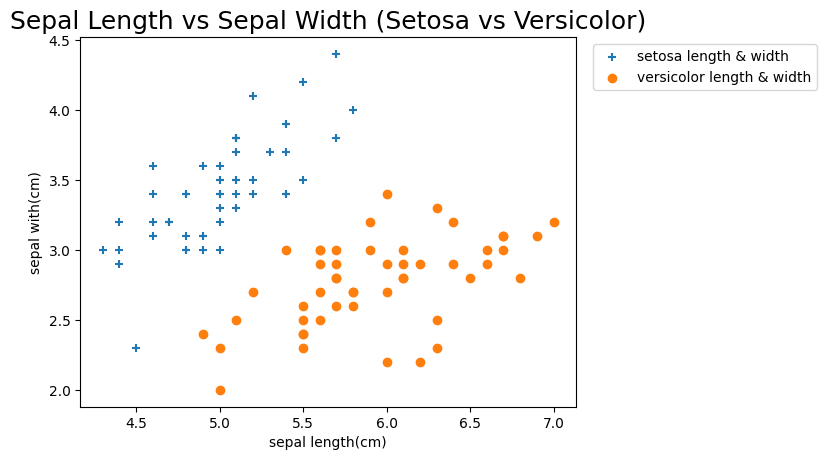

In [24]:
plt.scatter(df_0['sepal length (cm)'],df_0['sepal width (cm)'],marker='+',label ='setosa length & width')
plt.scatter(df_1['sepal length (cm)'],df_1['sepal width (cm)'],marker='o',label='versicolor length & width')
plt.xlabel('sepal length(cm)')
plt.ylabel('sepal with(cm)')
plt.legend(loc=0,bbox_to_anchor=(1,0.1,.5,.9))
plt.title('Sepal Length vs Sepal Width (Setosa vs Versicolor)',size=18)

Text(0.5, 1.0, 'Petal Length vs Petal Width (Setosa vs Versicolor)')

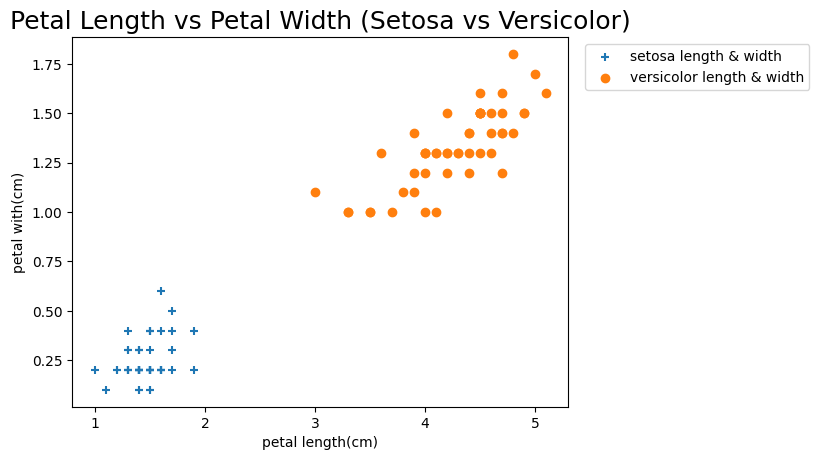

In [25]:
plt.scatter(df_0['petal length (cm)'],df_0['petal width (cm)'],marker='+',label ='setosa length & width')
plt.scatter(df_1['petal length (cm)'],df_1['petal width (cm)'],marker='o',label='versicolor length & width')
plt.xlabel('petal length(cm)')
plt.ylabel('petal with(cm)')
plt.legend(loc=0,bbox_to_anchor=(1,0.1,.5,.9))
plt.title('Petal Length vs Petal Width (Setosa vs Versicolor)',size=18)

In [26]:
x = df.drop(['target','flower'],axis=1)
y = df.target
z = df.flower

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.1,random_state=1)

# Create KNN (K Neighrest Neighbour Classifier)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=16).fit(x_train,y_train)

In [29]:
knn.score(x_test,y_test)

1.0

In [30]:
knn.score(x_train,y_train)

0.9703703703703703

In [31]:
knn.predict([[6.3,3.3,6.0,2.5]])

array([2])

In [32]:
y_pred = knn.predict(x_test)
y_pred 

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1])

In [33]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report
y_pred = knn.predict(x_test)
print('accuracy_scorec',accuracy_score(y_test,y_pred),'\n')
#print('precision_score',precision_score(y_test,y_pred))
print('confusion_matrix \n',confusion_matrix(y_test,y_pred),'\n')
print('classification_report',classification_report(y_test,y_pred))

accuracy_scorec 1.0 

confusion_matrix 
 [[5 0 0]
 [0 6 0]
 [0 0 4]] 

classification_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



Text(50.722222222222214, 0.5, 'Truth')

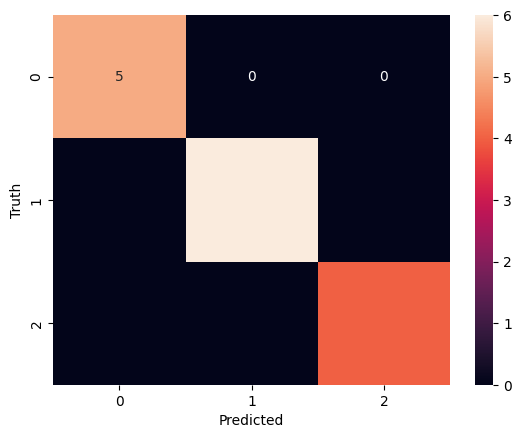

In [34]:
cm = confusion_matrix(y_test,y_pred)
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [35]:
# Example
from sklearn.datasets import load_digits
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [36]:
df = pd.DataFrame(digits.data,digits.target,columns=digits.feature_names)
df.index+=1
df['target'] = digits.target
df.sample(10)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
2,0.0,0.0,5.0,12.0,12.0,8.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,10.0,12.0,0.0,0.0,0.0,1
3,0.0,3.0,14.0,15.0,6.0,0.0,0.0,0.0,0.0,7.0,...,0.0,0.0,4.0,15.0,13.0,12.0,11.0,1.0,0.0,2
10,0.0,0.0,6.0,14.0,16.0,15.0,1.0,0.0,0.0,9.0,...,0.0,0.0,0.0,9.0,16.0,1.0,0.0,0.0,0.0,9
6,0.0,4.0,15.0,16.0,16.0,16.0,4.0,0.0,0.0,4.0,...,0.0,0.0,5.0,16.0,16.0,12.0,0.0,0.0,0.0,5
1,0.0,0.0,1.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,13.0,16.0,15.0,1.0,0.0,0
10,0.0,0.0,6.0,15.0,5.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,7.0,12.0,13.0,12.0,1.0,0.0,9
9,0.0,0.0,11.0,14.0,10.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.0,14.0,15.0,11.0,0.0,0.0,8
10,0.0,0.0,6.0,15.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,16.0,14.0,9.0,4.0,0.0,9
8,0.0,0.0,9.0,14.0,16.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,11.0,0.0,0.0,0.0,0.0,7
5,0.0,0.0,0.0,5.0,16.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,10.0,0.0,0.0,0.0,4


In [37]:
x = df.drop('target',axis=1)
y = df.target

In [38]:
# from sklearn.preprocessing import MinMaxScaler
# mns = MinMaxScaler()
# mns.fit(x)
# x_sc = mns.transform(x)

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.1,random_state=2)

In [40]:
len(x_train)

1617

In [41]:
len(y_train)

1617

In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(x_train,y_train)
print(lr.score(x_train,y_train))
lr.score(x_test,y_test)

1.0


0.9333333333333333

In [43]:
from sklearn.neighbors import KNeighborsClassifier
kmm = KNeighborsClassifier(n_neighbors=5).fit(x,y)

In [44]:
kmm.score(x_test,y_test)

0.9833333333333333

In [45]:
kmm.score(x_train,y_train)

0.9913419913419913

# Principal Component Analysis

In [46]:
from sklearn.datasets import load_digits
digit = load_digits()

In [47]:
dir(digit)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [48]:
x = pd.DataFrame(digit.data,columns=digit.feature_names)
y = pd.DataFrame(digit.target)

In [49]:
x.shape

(1797, 64)

### Use components such that 95% of variance is retained

In [50]:
from sklearn.decomposition import PCA
pca = PCA(.95)
x_pca = pca.fit_transform(x)

In [51]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

#### PCA created 29 components out of 64 original columns

In [52]:
x_pca.shape

(1797, 29)

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x_pca,y,test_size=.1)

In [54]:
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))
lr.score(x_test,y_test)

1.0


0.9166666666666666

In [55]:
pca = PCA(3)
x_pca1 = pca.fit_transform(x)
x_pca1

array([[ -1.25946527,  21.27488017,  -9.46303471],
       [  7.95760928, -20.76870396,   4.43950904],
       [  6.99192373,  -9.9559813 ,   2.95854344],
       ...,
       [ 10.8012836 ,  -6.96025196,   5.59954956],
       [ -4.8720963 ,  12.42395435, -10.17084479],
       [ -0.34438849,   6.36555429,  10.77369836]])

In [56]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594])

You can see that both combined retains 0.14+0.13+0.11=0.38 or 38% of important feature information

In [57]:
x_pca1.shape

(1797, 3)

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x_pca1,y,test_size=.1)

In [59]:
lr.fit(x_train,y_train)
print(lr.score(x_test,y_test))
lr.score(x_train,y_train)

0.7055555555555556


0.7000618429189858

We get less accuancy (~70%) as using only 3 components did not retain much of the feature information. However in real life you will find many cases where using 2 or few PCA components can still give you a pretty good accuracy

# Ensemble Learning: Bagging

In [60]:
#!jt -r --reset

Reset css and font defaults in:
C:\Users\kotesh\.jupyter\custom &
C:\Users\kotesh\AppData\Roaming\jupyter\nbextensions


In [113]:
import pandas as pd 
import numpy as np 
import warnings
warnings.simplefilter('ignore')
%reload_ext autoreload
%autoreload 2

In [114]:
df = pd.read_csv('heart.csv')
df.sample(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
842,43,F,ASY,132,341,1,LVH,136,Y,3.0,Flat,1
690,45,M,ASY,142,309,0,LVH,147,Y,0.0,Flat,1
743,52,M,ATA,134,201,0,Normal,158,N,0.8,Up,0
200,47,M,TA,110,249,0,Normal,150,N,0.0,Up,0
258,51,F,NAP,150,200,0,Normal,120,N,0.5,Up,0
369,63,M,ASY,150,0,0,Normal,86,Y,2.0,Flat,1
530,50,M,ASY,133,218,0,Normal,128,Y,1.1,Flat,1
106,48,F,ASY,120,254,0,ST,110,N,0.0,Up,0
875,58,F,NAP,120,340,0,Normal,172,N,0.0,Up,0
772,45,M,ATA,128,308,0,LVH,170,N,0.0,Up,0


In [115]:
df.shape

(918, 12)

In [116]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## Treat Outliers

In [117]:
df[df['RestingBP']>(df['RestingBP'].mean()+3*df['RestingBP'].std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
399,61,M,NAP,200,0,1,ST,70,N,0.0,Flat,1
592,61,M,ASY,190,287,1,LVH,150,Y,2.0,Down,1
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1


In [118]:
df1 = df[df['RestingBP']<=(df.RestingBP.mean()+3*df.RestingBP.std())]
df1.shape

(911, 12)

In [119]:
df1[df1['Cholesterol']>(df1.Cholesterol.mean()+3*df1.Cholesterol.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0


In [120]:
df2 = df1[df1['Cholesterol']<=(df1.Cholesterol.mean()+3*df1.Cholesterol.std())]
df2.shape

(908, 12)

In [121]:
df2[df2['FastingBS']>(df2.FastingBS.mean()+3*df2.FastingBS.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [122]:
df2[df2['MaxHR']>(df2.MaxHR.mean()+3*df2.MaxHR.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [123]:
df2[df2['Oldpeak']>(df2.Oldpeak.mean()+3*df2.Oldpeak.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
166,50,M,ASY,140,231,0,ST,140,Y,5.0,Flat,1
702,59,M,TA,178,270,0,LVH,145,N,4.2,Down,0
771,55,M,ASY,140,217,0,Normal,111,Y,5.6,Down,1
791,51,M,ASY,140,298,0,Normal,122,Y,4.2,Flat,1
850,62,F,ASY,160,164,0,LVH,145,N,6.2,Down,1
900,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1


In [124]:
df3 = df2[df2['Oldpeak']<=(df2.Oldpeak.mean()+3*df2.Oldpeak.std())]
df3.shape

(902, 12)

In [125]:
df3.Sex.unique()

array(['M', 'F'], dtype=object)

In [126]:
df3.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [127]:
df3.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [128]:
df3.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

In [129]:
df3.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

### Handle text columns using label encoding and one hot encoding

In [133]:
df3.ST_Slope.replace(
    {
       'Up':0,
       'Flat':1,
        'Down':2,
    },inplace=True
)

df3.ExerciseAngina.replace(
    {
        'N':0,
        'Y':1
    },inplace=True
)

df3.RestingECG.replace(
    {
        'Normal':0,
        'ST':1,
        'LVH':2
    },inplace=True
)

df3.ChestPainType.replace(
    {
        'ATA':0,
        'NAP':1,
        'ASY':2,
        'TA':3
    },inplace=True
)

df3.Sex.replace(
    {
        'M':0,
        'F':1
    },inplace=True
)
df3

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,0,132,0,1.2,1,1
914,68,0,2,144,193,1,0,141,0,3.4,1,1
915,57,0,2,130,131,0,0,115,1,1.2,1,1
916,57,1,0,130,236,0,2,174,0,0.0,1,1


In [134]:
x = df3.drop('HeartDisease',axis=1)
y = df3.HeartDisease

In [135]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_ss = ss.fit_transform(x)

In [137]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_ss,y,test_size=.1,random_state=2)

### Train a model using standalone support vector machine and then using bagging

In [144]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.1,random_state=2)

In [145]:
sv = SVC().fit(x_train,y_train)
sv

SVC()

In [146]:
sv.score(x_test,y_test)

0.7362637362637363

In [161]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

score = cross_val_score(SVC(),x_ss,y,cv=5)
print(score)
score.mean()

[0.85082873 0.87292818 0.81111111 0.80555556 0.76111111]


0.8203069367710251

### Use bagging now with svm

In [164]:
from sklearn.ensemble import BaggingClassifier

bg_model = BaggingClassifier( 
    base_estimator = SVC(),
    n_estimators=200,
     oob_score=True,
    max_features=.1,
    random_state=0
)
score = cross_val_score(bg_model,x_ss,y,cv=5)
print(score)
score.mean()

[0.8121547  0.84530387 0.78333333 0.85555556 0.76666667]


0.8126028238182934

As you can see above, using bagging in case of SVM doesn't make much difference in terms of model accuracy. Bagging is effective when we have high variance and instable model such as decision tree. Let's explore how bagging changes the performance for a decision tree classifier.

### Train a model using decision tree and then using bagging

In [165]:
from sklearn.tree import DecisionTreeClassifier

score = cross_val_score(DecisionTreeClassifier(),x_ss,y,cv=5)
print(score)
score.mean()

[0.74585635 0.77900552 0.77777778 0.77777778 0.61666667]


0.7394168201350522

### Use bagging now with DessionTree

In [168]:
bg_model1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                              n_estimators=100,oob_score=True,
                              max_samples=.9,random_state=0)
score = cross_val_score(bg_model,x_ss,y)
print(score)
score.mean()

[0.8121547  0.84530387 0.78333333 0.85555556 0.76666667]


0.8126028238182934

You can see that with bagging the score improved from 73.94% to 81.26%

In [4]:
%%time
# Your code here

CPU times: total: 0 ns
Wall time: 0 ns


### Train a model using  random forest and then using bagging

In [176]:
from sklearn.ensemble import RandomForestClassifier

score = cross_val_score(RandomForestClassifier(),x_ss,y,cv=5)
print(score)
score.mean()

[0.86740331 0.82872928 0.83333333 0.82222222 0.75555556]


0.8214487415592387

In [183]:
bg_model2 = BaggingClassifier(base_estimator=RandomForestClassifier(),
               n_estimators=100,oob_score=True,max_samples=.9)

score = cross_val_score(bg_model2,x_ss,y,cv=5)
print(score)
print(score.mean())


[0.88950276 0.83425414 0.83333333 0.85555556 0.75555556]
0.8336402701043586


In [2]:
%load_ext watermark

In [184]:
#!pip install watermark

In [3]:
%watermark -i -v -p pandas,numpy

Python implementation: CPython
Python version       : 3.11.4
IPython version      : 8.12.0

pandas: 2.1.1
numpy : 1.26.0

